<a href="https://colab.research.google.com/github/esmika-001/Tuberculosis-Detection-in-X-ray-Images/blob/main/densenet169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# Upload your Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels


Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
chest-xray-masks-and-labels.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('chest-xray-masks-and-labels.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/chest_xray_dataset')


In [ ]:
import os

dataset_dir = '/content/chest_xray_dataset'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))

/content/chest_xray_dataset/Lung Segmentation/NLM-ChinaCXRSet-ReadMe.docx
/content/chest_xray_dataset/Lung Segmentation/NLM-MontgomeryCXRSet-ReadMe.pdf
/content/chest_xray_dataset/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0025_0.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0487_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0565_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0500_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0194_0.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0492_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0481_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0207_0.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0497_1.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0038_0.png
/content/chest_xray_dataset/Lung Segmentation/test/CHNCXR_0345_1.

In [ ]:
import os
import pandas as pd
from PIL import Image

In [ ]:
image_folder = 'chest_xray_dataset/Lung Segmentation/CXR_png/'
results_folder = 'chest_xray_dataset/Lung Segmentation/ClinicalReadings/'
mask_folder = 'chest_xray_dataset/Lung Segmentation/masks/'

data = []

for filename in os.listdir(results_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(results_folder, filename), 'r') as file:
            lines = file.readlines()
            if len(lines) < 2:
                continue
            gender_age = lines[0].strip().split()
            if len(gender_age) != 2:
                continue
            gender = gender_age[0].lower()
            age_with_units = gender_age[1]
            try:
                age = int(age_with_units.replace('yrs', ''))
            except ValueError:
                continue
            diagnosis = lines[1].strip().lower()

        image_base_name = filename.replace('.txt', '')
        image_path_png = os.path.join(image_folder, image_base_name + '.png')
        image_path_jpg = os.path.join(image_folder, image_base_name + '.jpg')

        if os.path.exists(image_path_png):
            image_path = image_path_png
        elif os.path.exists(image_path_jpg):
            image_path = image_path_jpg
        else:
            continue

        mask_path = os.path.join(mask_folder, image_base_name + '_mask.png')
        if not os.path.exists(mask_path):
            continue

        data.append([image_path, mask_path, gender, age, diagnosis])

df_mask = pd.DataFrame(data, columns=['Image', 'Mask', 'Gender', 'Age', 'Diagnosis'])

print(df_mask);

                                                 Image  \
0    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
..                                                 ...   
543  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
544  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
545  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
546  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
547  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                  Mask  Gender  Age  \
0    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   63   
1    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   42   
2    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   23   
3    chest_xray_dat

In [ ]:
# Check for missing values
print("\nMissing values before dropping:")
print(df_mask.isnull().sum())

df_mask.dropna(inplace=True)

print("\nDataFrame after dropping missing values:")
print(df_mask.head())

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})
df_mask = df_mask[df_mask['Diagnosis'].notnull() & (df_mask['Diagnosis'] != '')]

print("\nCleaned DataFrame:")
print(df_mask.head())



Missing values before dropping:
Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64

DataFrame after dropping missing values:
                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...   male   63   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...   male   42   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...   male   23   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...   male   65   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...   male   18   

                      Diagnosis  
0  right ptb,right pneumothorax  
1                      

In [ ]:
print(df_mask.isnull().sum())
df_mask.dropna(inplace=True)  # Option to drop rows with missing values

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})
df_mask['Age'] = df_mask['Age'].astype(int)

Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64


In [ ]:
df_mask.to_csv('cleaned_lung_xrays_data.csv', index=False)

In [ ]:
df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')
print(df_cleaned.head())
print(df_cleaned.info())

                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   63   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   23   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   65   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   18   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   38   

                      Diagnosis  
0  right ptb,right pneumothorax  
1                        normal  
2                 bilateral ptb  
3                 bilateral ptb  
4                     right ptb  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

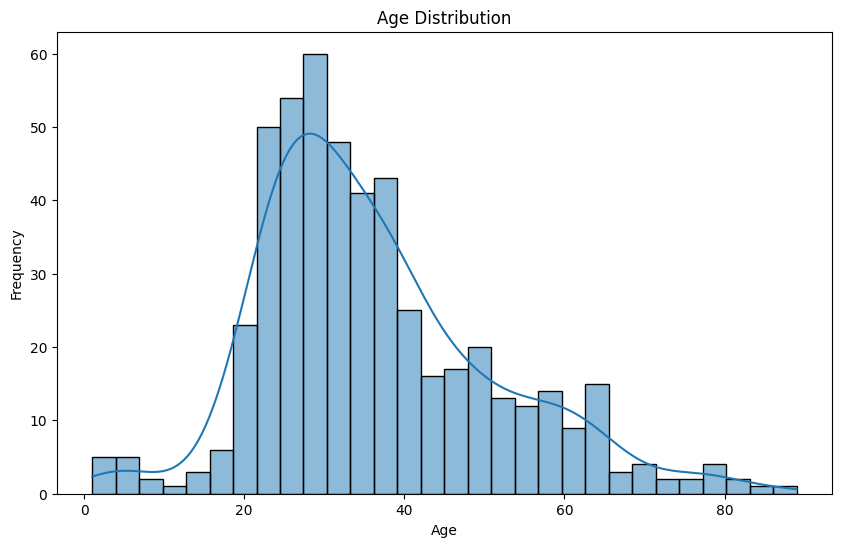

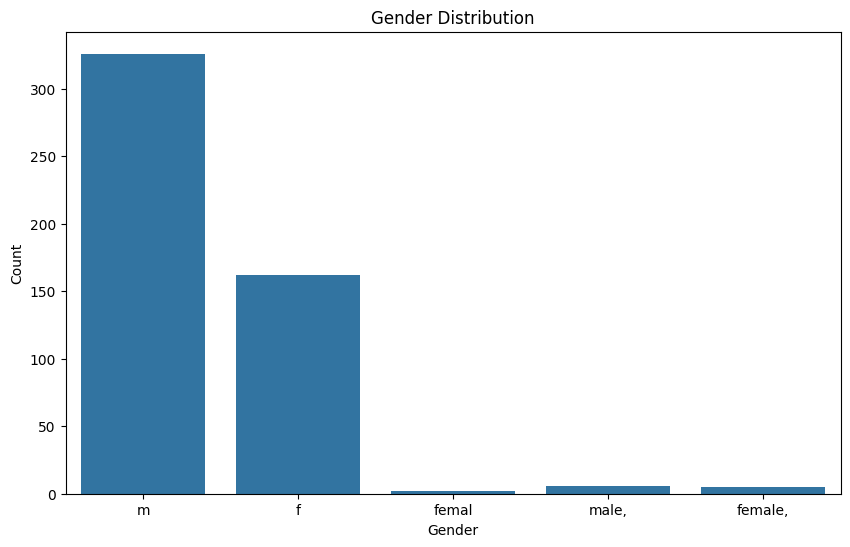

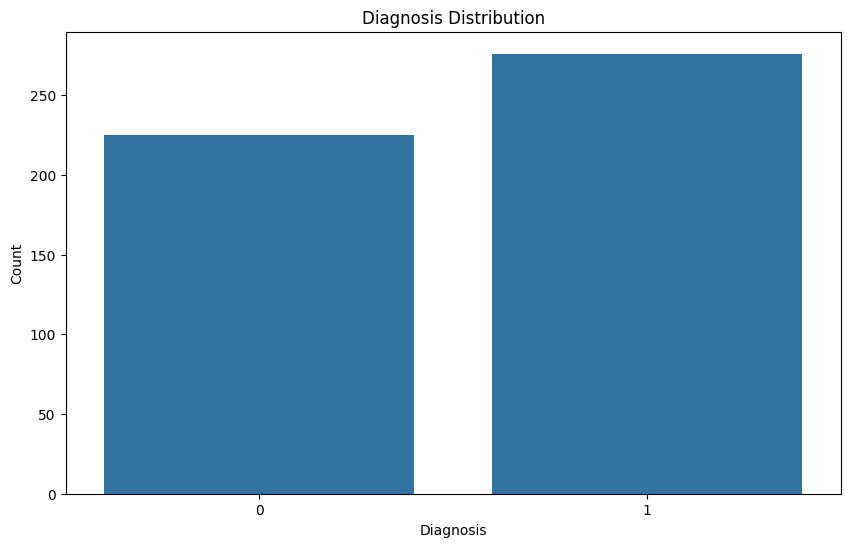

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df_cleaned)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

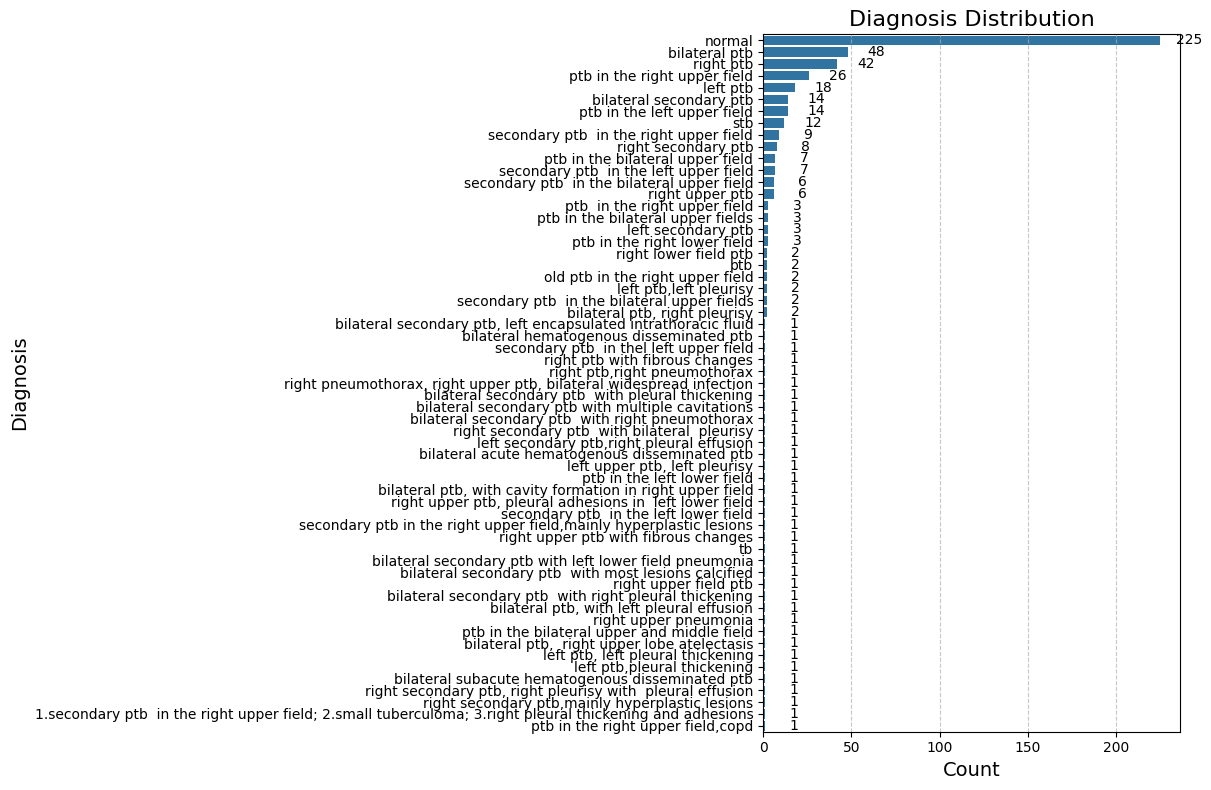

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Diagnosis', data=df_cleaned, order=df_cleaned['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_width(), '.0f'),
                       (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(20, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda x: 0 if x == 'normal' else 1)
print(df_cleaned['Diagnosis'].value_counts())


Diagnosis
1    276
0    225
Name: count, dtype: int64


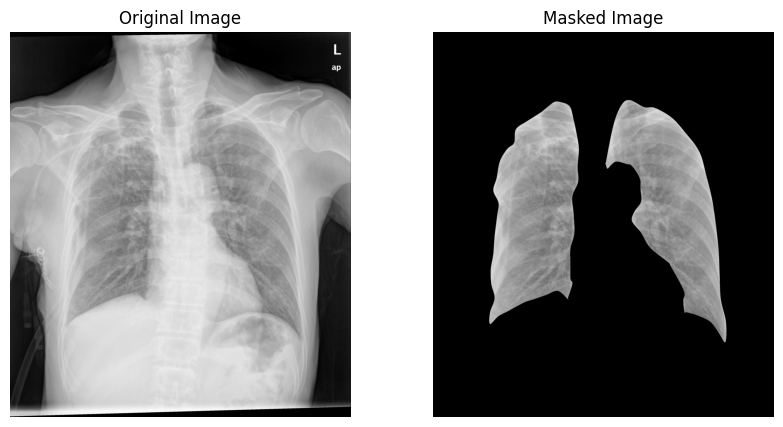

In [ ]:
import cv2

def read_and_preprocess_image(image_path, mask_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    masked_image = cv2.bitwise_and(image, image, mask=mask)

    return masked_image

sample_image_path = df_cleaned['Image'].iloc[0]
sample_mask_path = df_cleaned['Mask'].iloc[0]

sample_image = read_and_preprocess_image(sample_image_path, sample_mask_path)

# Display original and masked image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.imread(sample_image_path))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(sample_image)
axes[1].set_title('Masked Image')
axes[1].axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input

def read_and_preprocess_image(img_path, mask_path, target_size=(256, 256)):
    img = load_img(img_path, target_size=target_size)
    img = img_to_array(img)
    mask = load_img(mask_path, color_mode="grayscale", target_size=target_size)
    mask = img_to_array(mask)
    return img

def preprocess_data(image_paths, mask_paths, target_size=(256, 256)):
    images = []
    for img_path, mask_path in zip(image_paths, mask_paths):
        img = read_and_preprocess_image(img_path, mask_path, target_size)
        images.append(img)
    images = np.array(images, dtype='float32')
    images = preprocess_input(images)  # Normalize and preprocess
    return images


In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, image_paths, mask_paths, labels, batch_size=4, target_size=(256, 256), shuffle=True):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[k] for k in indexes]
        batch_mask_paths = [self.mask_paths[k] for k in indexes]
        batch_labels = [self.labels[k] for k in indexes]
        X = preprocess_data(batch_image_paths, batch_mask_paths, self.target_size)
        y = np.array(batch_labels)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

image_paths = df_cleaned['Image'].tolist()
mask_paths = df_cleaned['Mask'].tolist()
labels = df_cleaned['Diagnosis'].values

X_train_paths, X_val_paths, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
mask_train_paths, mask_val_paths = train_test_split(mask_paths, test_size=0.2, random_state=42)

train_generator = DataGenerator(X_train_paths, mask_train_paths, y_train, batch_size=4, target_size=(256, 256))
val_generator = DataGenerator(X_val_paths, mask_val_paths, y_val, batch_size=4, target_size=(256, 256))


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def clear_memory():
    K.clear_session()

# Create the DenseNet169 model
input_tensor = Input(shape=(256, 256, 3))
base_model = DenseNet169(include_top=False, input_tensor=input_tensor, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Change to number of classes if multi-class

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model with memory clearing callback
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 262, 262, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1/conv[0][0]']    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

# Function to clear memory
def clear_memory():
    K.clear_session()

# Predict on the validation dataset
val_generator.reset()  # Reset the generator to start from the beginning
y_pred_probs = model.predict(val_generator, steps=val_steps_per_epoch)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels from the generator
y_true = val_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

# Unfreeze some layers and fine-tune the model if needed
for layer in base_model.layers[-20:]:
    layer.trainable = True

# model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=35, batch_size=8, validation_split=0.2)


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(class_report)

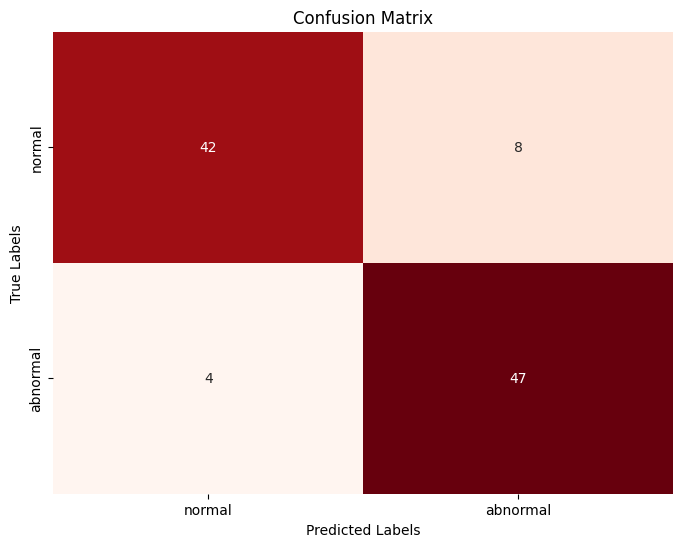

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming you already have conf_matrix from your code snippet
confusion_matrix = np.array([[42, 8], [4, 47]])

# Calculate the confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['normal', 'abnormal'],
            yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = DenseNet169(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Add more layers to the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

# Unfreeze some layers and fine-tune the model if needed
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again with fine-tuning
model.fit(X_train, y_train, epochs=35, batch_size=8, validation_split=0.2)

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=8, validation_split=0.2)

# Unfreeze some layers and fine-tune the model if needed
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=7, batch_size=8, validation_split=0.2)


Epoch 1/25
40/40 [==============================] - 91s 2s/step - loss: 1.1112 - accuracy: 0.5875 - val_loss: 0.5316 - val_accuracy: 0.7375
Epoch 2/25
40/40 [==============================] - 68s 2s/step - loss: 0.4374 - accuracy: 0.7875 - val_loss: 0.4169 - val_accuracy: 0.8000
Epoch 3/25
40/40 [==============================] - 74s 2s/step - loss: 0.3474 - accuracy: 0.8406 - val_loss: 0.4027 - val_accuracy: 0.8125
Epoch 4/25
40/40 [==============================] - 64s 2s/step - loss: 0.3091 - accuracy: 0.8531 - val_loss: 0.4155 - val_accuracy: 0.8000
Epoch 5/25
40/40 [==============================] - 66s 2s/step - loss: 0.2916 - accuracy: 0.8875 - val_loss: 0.3743 - val_accuracy: 0.7875
Epoch 6/25
40/40 [==============================] - 73s 2s/step - loss: 0.2534 - accuracy: 0.9062 - val_loss: 0.4562 - val_accuracy: 0.8000
Epoch 7/25
40/40 [==============================] - 65s 2s/step - loss: 0.2353 - accuracy: 0.9156 - val_loss: 0.4986 - val_accuracy: 0.7875
Epoch 8/25
40/40 [==

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(class_report)

4/4 [==============================] - 24s 4s/step
Confusion Matrix:
[[38  9]
 [14 40]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.81      0.77        47
     Class 1       0.82      0.74      0.78        54

    accuracy                           0.77       101
   macro avg       0.77      0.77      0.77       101
weighted avg       0.78      0.77      0.77       101

